In [1]:
import matplotlib.pyplot as plt
import numpy as np
from wrf import to_np, getvar, get_basemap, latlon_coords
from netCDF4 import Dataset
from metpy.plots import colortables
from matplotlib import path
import geopandas as gpd
import shapely
from matplotlib.patches import Polygon
#import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
import matplotlib.patches as patches
from descartes import PolygonPatch
import xarray as xr
from scipy.ndimage import gaussian_filter as gfilt

In [2]:
#the control run
wrf_control_orig_0 = 'wrf4km_ens_2'

wrf_gombasn_cool_1 = 'wrf4km_sst_gombasin_cool_1'
wrf_gombasn_cool_2 = 'wrf4km_sst_gombasin_cool_2'
wrf_gomplum_cool_1 = 'wrf4km_sst_gomplume_cool_1'
wrf_gomplum_cool_2 = 'wrf4km_sst_gomplume_cool_2'
wrf_murgion_cool_1 = 'wrf4km_sst_muregion_cool_1'
wrf_murgion_cool_2 = 'wrf4km_sst_muregion_cool_2'

wrf_gombasn_warm_1 = 'wrf4km_sst_gombasin_warm_1'
wrf_gombasn_warm_2 = 'wrf4km_sst_gombasin_warm_2'
wrf_gomplum_warm_1 = 'wrf4km_sst_gomplume_warm_1'
wrf_gomplum_warm_2 = 'wrf4km_sst_gomplume_warm_2'
wrf_murgion_warm_1 = 'wrf4km_sst_muregion_warm_1'
wrf_murgion_warm_2 = 'wrf4km_sst_muregion_warm_2'

UH_thresholds = np.array([60])

mask_data = xr.open_dataset('/glade/work/molina/DATA/usstates_shapefiles/conus_mask_res_80.nc')


def percent_change(data1,data2,data_mask):
   
    return np.divide((data1.UH_dates.where(data_mask.conus.values, 0).sum()-
                       data2.UH_dates.where(data_mask.conus.values, 0).sum()),
                       data2.UH_dates.where(data_mask.conus.values, 0).sum())*100


def percent_change_scalar(data1,data2):
   
    return np.divide((data1-data2),data2)*100

In [3]:
for nume, UH_threshold in enumerate(UH_thresholds):

    control_orig_0=xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/'+wrf_control_orig_0+'/newvert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_control_orig_0 = np.where(mask_data.conus.values,control_orig_0.where(control_orig_0.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_cool_1 = np.where(mask_data.conus.values,gombasn_cool_1.where(gombasn_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_cool_2 = np.where(mask_data.conus.values,gombasn_cool_2.where(gombasn_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gomplum_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_cool_1 = np.where(mask_data.conus.values,gomplum_cool_1.where(gomplum_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gomplum_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_cool_2 = np.where(mask_data.conus.values,gomplum_cool_2.where(gomplum_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    murgion_cool_1=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_cool_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_cool_1 = np.where(mask_data.conus.values,murgion_cool_1.where(murgion_cool_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    murgion_cool_2=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_cool_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_cool_2 = np.where(mask_data.conus.values,murgion_cool_2.where(murgion_cool_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

    gombasn_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_warm_1 = np.where(mask_data.conus.values,gombasn_warm_1.where(gombasn_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gombasn_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gombasn_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gombasn_warm_2 = np.where(mask_data.conus.values,gombasn_warm_2.where(gombasn_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gomplum_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_warm_1 = np.where(mask_data.conus.values,gomplum_warm_1.where(gomplum_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    gomplum_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_gomplum_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_gomplum_warm_2 = np.where(mask_data.conus.values,gomplum_warm_2.where(gomplum_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    murgion_warm_1=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_warm_1+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_warm_1 = np.where(mask_data.conus.values,murgion_warm_1.where(murgion_warm_1.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)
    
    murgion_warm_2=xr.open_dataset('/glade/scratch/molina/'+wrf_murgion_warm_2+'/vert_grid_80_UH_'+str(UH_threshold)+'.nc')
    new_murgion_warm_2 = np.where(mask_data.conus.values,murgion_warm_2.where(murgion_warm_2.UH_dates == 0, 1).UH_dates.resample(time='12H',base=9).sum('time'),0)

In [5]:
file2_wrf_d02 = '/glade/scratch/molina/'+wrf_control_orig_0+'/wrfout_d01_2017-01-15_09:00:00'
ncfile2_wrf_d02 = Dataset(file2_wrf_d02)
while True:
    dbz2_wrf_d02 = np.array([0])
    if len(dbz2_wrf_d02) == 1:
        try: 
            dbz2_wrf_d02 = getvar(ncfile2_wrf_d02, "dbz")
        except ValueError:
            continue
    if len(dbz2_wrf_d02) != 1:
        print('File Opened...')
        break
        
        
m = get_basemap(dbz2_wrf_d02)

#gom basin region
patches_gom = []
can = gpd.GeoDataFrame.from_file("/glade/work/molina/DATA/ocean_shapefiles/World_Seas_WGS84.shp")
gom = can[can['NAME']=='Gulf of Mexico']
studyarea = shapely.geometry.box(m.llcrnrlon, m.llcrnrlat, 
                                 m.urcrnrlon, m.urcrnrlat)
selection = gom[gom.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(m, poly)
        patches_gom.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(m, poly)
            patches_gom.append(PolygonPatch(mpoly))
    else:
        print(poly, ' is neither a polygon nor a multi-polygon. Skipping it.')
        
        
timeint=0

File Opened...


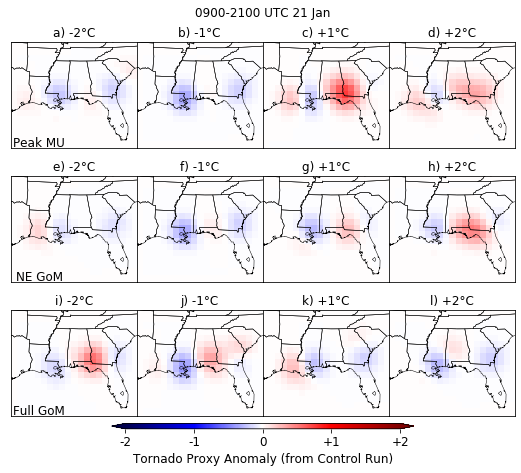

In [7]:
#########################################################################################
#########################################################################################
#########################################################################################


xmin, ymin = m(-96, 24)
xmax, ymax = m(-78, 37)

fig = plt.figure(figsize=(7.,6.))

fig.suptitle('0900-2100 UTC 21 Jan', x=0.5, y=1.0, fontsize=12)

a = u"\u00b0"


##############################################################################  


ax1 = fig.add_axes([0.0, 0.63, 0.25, 0.33])

ax1.set_title("a) -2"+a+"C", fontsize=12)

ax1.text(0.225, 0.05, 'Peak MU', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()

wspd_contours = m.pcolormesh(murgion_cool_2.lon.values[:], murgion_cool_2.lat.values[:], 
                             gfilt(new_murgion_cool_2[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#verts_mu = [
#           (m(-88., 18.)),  # left, bottom
#           (m(-88., 25.0)),  # left, top
#           (m(-85., 25.0)),  # right, top
#           (m(-85., 21.0)),
#           (m(-77., 21.0)),
#           (m(-77., 18.0)),
#            (0.,0.)
#            ]
#codes = [
#    Path.MOVETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.CLOSEPOLY,
#]
#path_mu = Path(verts_mu, codes)
#patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='r', ls='--', lw=0.75, alpha=1.)
#ax1.add_patch(patch_mu)

ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])

#m.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 


##############################################################################  


ax2 = fig.add_axes([0.25, 0.63, 0.25, 0.33])

ax2.set_title("b) -1"+a+"C", fontsize=12)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()

wspd_contours = m.pcolormesh(murgion_cool_1.lon.values, murgion_cool_1.lat.values, 
                             gfilt(new_murgion_cool_1[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#verts_mu = [
#           (m(-88., 18.)),  # left, bottom
#           (m(-88., 25.0)),  # left, top
#           (m(-85., 25.0)),  # right, top
#           (m(-85., 21.0)),
#           (m(-77., 21.0)),
#           (m(-77., 18.0)),
#            (0.,0.)
#            ]
#codes = [
#    Path.MOVETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.CLOSEPOLY,
#]
#path_mu = Path(verts_mu, codes)
#patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='r', ls='--', lw=0.75, alpha=1.)
#ax2.add_patch(patch_mu)


##############################################################################  


ax3 = fig.add_axes([0.5, 0.63, 0.25, 0.33])

ax3.set_title("c) +1"+a+"C", fontsize=12)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()

wspd_contours = m.pcolormesh(murgion_warm_1.lon.values, murgion_warm_1.lat.values, 
                             gfilt(new_murgion_warm_1[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#verts_mu = [
#           (m(-88., 18.)),  # left, bottom
#           (m(-88., 25.0)),  # left, top
#           (m(-85., 25.0)),  # right, top
#           (m(-85., 21.0)),
#           (m(-77., 21.0)),
#           (m(-77., 18.0)),
#            (0.,0.)
#            ]
#codes = [
#    Path.MOVETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.CLOSEPOLY,
#]
#path_mu = Path(verts_mu, codes)
#patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='r', ls='--', lw=0.75, alpha=1.)
#ax3.add_patch(patch_mu)


##############################################################################  


ax4 = fig.add_axes([0.75, 0.63, 0.25, 0.33])

ax4.set_title("d) +2"+a+"C", fontsize=12)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()

wspd_contours = m.pcolormesh(murgion_warm_2.lon.values, murgion_warm_2.lat.values, 
                             gfilt(new_murgion_warm_2[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#verts_mu = [
#           (m(-88., 18.)),  # left, bottom
#           (m(-88., 25.0)),  # left, top
#           (m(-85., 25.0)),  # right, top
#           (m(-85., 21.0)),
#           (m(-77., 21.0)),
#           (m(-77., 18.0)),
#            (0.,0.)
#            ]
#codes = [
#    Path.MOVETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.CLOSEPOLY,
#]
#path_mu = Path(verts_mu, codes)
#patch_mu = patches.PathPatch(path_mu, facecolor='none', edgecolor='r', ls='--', lw=0.75, alpha=1.)
#ax4.add_patch(patch_mu)


##############################################################################  


ax5 = fig.add_axes([0., 0.32, 0.25, 0.33])

ax5.set_title("e) -2"+a+"C", fontsize=12)

ax5.text(0.225, 0.05, 'NE GoM', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()
#m.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 

wspd_contours = m.pcolormesh(gomplum_cool_2.lon.values, gomplum_cool_2.lat.values, 
                             gfilt(new_gomplum_cool_2[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#verts_plume = [
#               (m(-84., 25.)),  # left, bottom
#               (m(-90., 30.5)),  # left, top
#               (m(-83., 30.5)),  # right, top
#               (m(-81., 25.)),  # right, bottom
#               (0., 0.),  # ignored
#                ]
#codes = [
#    Path.MOVETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.CLOSEPOLY,
#]
#path_plume = Path(verts_plume, codes)
#patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='r', ls='--', lw=0.75, alpha=1.)
#ax5.add_patch(patch_plume)

##############################################################################  


ax6 = fig.add_axes([0.25, 0.32, 0.25, 0.33])

ax6.set_title("f) -1"+a+"C", fontsize=12)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()

wspd_contours = m.pcolormesh(gomplum_cool_1.lon.values, gomplum_cool_1.lat.values, 
                             gfilt(new_gomplum_cool_1[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#verts_plume = [
#               (m(-84., 25.)),  # left, bottom
#               (m(-90., 30.5)),  # left, top
#               (m(-83., 30.5)),  # right, top
#               (m(-81., 25.)),  # right, bottom
#               (0., 0.),  # ignored
#                ]
#codes = [
#    Path.MOVETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.CLOSEPOLY,
#]
#path_plume = Path(verts_plume, codes)
#patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='r', ls='--', lw=0.75, alpha=1.)
#ax6.add_patch(patch_plume)

##############################################################################  


ax7 = fig.add_axes([0.5, 0.32, 0.25, 0.33])

ax7.set_title("g) +1"+a+"C", fontsize=12)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()

wspd_contours = m.pcolormesh(gomplum_warm_1.lon.values, gomplum_warm_1.lat.values, 
                             gfilt(new_gomplum_warm_1[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#verts_plume = [
#               (m(-84., 25.)),  # left, bottom
#               (m(-90., 30.5)),  # left, top
#               (m(-83., 30.5)),  # right, top
#               (m(-81., 25.)),  # right, bottom
#               (0., 0.),  # ignored
#                ]
#codes = [
#    Path.MOVETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.CLOSEPOLY,
#]
#path_plume = Path(verts_plume, codes)
#patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='r', ls='--', lw=0.75, alpha=1.)
#ax7.add_patch(patch_plume)

##############################################################################  


ax8 = fig.add_axes([0.75, 0.32, 0.25, 0.33])

ax8.set_title("h) +2"+a+"C", fontsize=12)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()

wspd_contours = m.pcolormesh(gomplum_warm_2.lon.values, gomplum_warm_2.lat.values, 
                             gfilt(new_gomplum_warm_2[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#verts_plume = [
#               (m(-84., 25.)),  # left, bottom
#               (m(-90., 30.5)),  # left, top
#               (m(-83., 30.5)),  # right, top
#               (m(-81., 25.)),  # right, bottom
#               (0., 0.),  # ignored
#                ]
#codes = [
#    Path.MOVETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.LINETO,
#    Path.CLOSEPOLY,
#]
#path_plume = Path(verts_plume, codes)
#patch_plume = patches.PathPatch(path_plume, facecolor='none', edgecolor='r', ls='--', lw=0.75, alpha=1.)
#ax8.add_patch(patch_plume)

##############################################################################  


ax9 = fig.add_axes([0., 0.01, 0.25, 0.33])

ax9.set_title("i) -2"+a+"C", fontsize=12)

ax9.text(0.225, 0.05, 'Full GoM', fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax9.transAxes)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()
#m.drawparallels(np.arange(int(20),int(41),10),labels=[1,0,0,0], linewidth=0., fontsize=12) 
#m.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)   

wspd_contours = m.pcolormesh(gombasn_cool_2.lon.values, gombasn_cool_2.lat.values, 
                             gfilt(new_gombasn_cool_2[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#ax9.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='r', ls='--', lw=0.7, alpha=1.))

##############################################################################  


ax10 = fig.add_axes([0.25, 0.01, 0.25, 0.33])

ax10.set_title("j) -1"+a+"C", fontsize=12)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()
#m.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = m.pcolormesh(gombasn_cool_1.lon.values, gombasn_cool_1.lat.values, 
                             gfilt(new_gombasn_cool_1[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#ax10.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='r', ls='--', lw=0.7, alpha=1.))

##############################################################################  


ax11 = fig.add_axes([0.5, 0.01, 0.25, 0.33])

ax11.set_title("k) +1"+a+"C", fontsize=12)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()
#m.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12)  

wspd_contours = m.pcolormesh(gombasn_warm_1.lon.values, gombasn_warm_1.lat.values, 
                             gfilt(new_gombasn_warm_1[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#ax11.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='r', ls='--', lw=0.7, alpha=1.))

##############################################################################  


ax12 = fig.add_axes([0.75, 0.01, 0.25, 0.33])

ax12.set_title("l) +2"+a+"C", fontsize=12)

m.drawcoastlines(linewidth=0.5)
m.drawcountries()
m.drawstates()


wspd_contours = m.pcolormesh(gombasn_warm_2.lon.values, gombasn_warm_2.lat.values, 
                             gfilt(new_gombasn_warm_2[timeint,:,:]-new_control_orig_0[timeint,:,:],sigma=1.5),
                             cmap=plt.cm.get_cmap('seismic'), vmin=-2, vmax=2)

#ax12.add_collection(PatchCollection(patches_gom, facecolor='none', edgecolor='r', ls='--', lw=0.7, alpha=1.))

##############################################################################  






ax2.set_xlim([xmin, xmax])
ax2.set_ylim([ymin, ymax])

ax3.set_xlim([xmin, xmax])
ax3.set_ylim([ymin, ymax])

ax4.set_xlim([xmin, xmax])
ax4.set_ylim([ymin, ymax])

ax5.set_xlim([xmin, xmax])
ax5.set_ylim([ymin, ymax])

ax6.set_xlim([xmin, xmax])
ax6.set_ylim([ymin, ymax])

ax7.set_xlim([xmin, xmax])
ax7.set_ylim([ymin, ymax])

ax8.set_xlim([xmin, xmax])
ax8.set_ylim([ymin, ymax])

ax9.set_xlim([xmin, xmax])
ax9.set_ylim([ymin, ymax])

ax10.set_xlim([xmin, xmax])
ax10.set_ylim([ymin, ymax])

ax11.set_xlim([xmin, xmax])
ax11.set_ylim([ymin, ymax])

ax12.set_xlim([xmin, xmax])
ax12.set_ylim([ymin, ymax])

#m.drawmeridians(np.arange(int(-95),int(-81),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12, ax=ax12)  


cbar_ax = fig.add_axes([0.2, 0.023, 0.6, 0.0125])

tickss = [-2,-1,0,1,2]
cbar = fig.colorbar(wspd_contours, ticks=tickss, cax=cbar_ax, orientation="horizontal", extend='both')
cbar.ax.set_xticklabels(['-2','-1','0','+1','+2'])
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Tornado Proxy Anomaly (from Control Run)', fontsize=12)


##############################################################################  


plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig11.png', bbox_inches='tight', pad_inches=0.075, dpi=1200)
plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig11_lowdpi.png', bbox_inches='tight', pad_inches=0.075, dpi=200)
plt.show()
plt.close()


##############################################################################  
##############################################################################  
##############################################################################  
